In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Check that MPS is available
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    mps_device = torch.device("mps")

print("Using device : ", mps_device)    

Using device :  mps


In [ ]:
features = pd.read_pickle("./saved_features/feature_extraction_D1_test.pkl")
print(features["features"])
list_of_features = [feature['features_RGB'][2] for feature in features["features"]]
clips_feature = list_of_features
#for feature in list_of_features:
    #clips_feature.extend(feature)



### to Torch Tensor

In [4]:
clips_feature_tensor = np.array(clips_feature)
print(clips_feature_tensor.shape)

(435, 1024)


In [5]:
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(clips_feature_tensor)

y_kmeans = kmeans.predict(clips_feature_tensor)

pca = PCA(n_components=2)
X = pca.fit_transform(clips_feature_tensor)

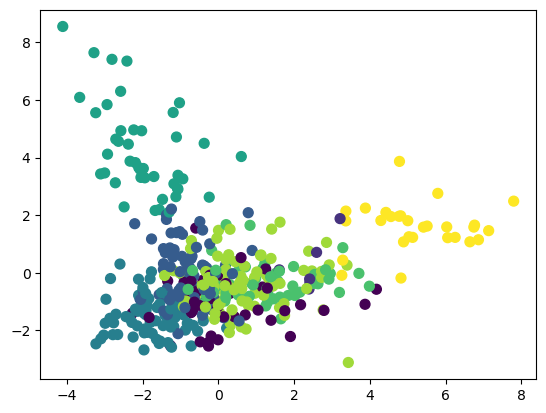

In [8]:
# scatter plot of X values
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

plt.show()
